## PHYS-243 Spring 2019 - Brandon Evans - Homework 3
#### Dr. Mobasher, TA Abtin Shahidi
#### 27-Apr-2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Problem 1 - Probability of l>t
#### Assumptions/Expectations:
*  Needle rotates angles 0 to $\pi$ radians
*  At some length (l) and angle $\theta$, we no longer are concerned with distance from $\frac{t}{2}$, thus probability should increase and approach near 1 with length (l)
*  Think about how integration of $l \leq t$ and $l \gt t$ will have different limits, per Abtin's guidance

Note: Handworked math attached as image in GitHub folder.

<u>Short Needle:</u><br>
Recall in case of $l \leq t$, that probability is within linear proportion, $P=(\frac{l}{t})(\frac{2}{\pi})$


<u>Long Needle:</u><br>
I think it will be easier to set $x=\frac{t}{l}$
<br><br>
Find area a from 0 to curve crossing t:<br>
$\int\limits_{\theta=0}^{\arcsin(x)}l \sin(\theta) d \theta$ <br>
$a=l(1-\sqrt{1-x^2})$<br><br>

Crossing happens twice, so $2a$<br>
Find area between crossings:<br>
$t(\pi-2(\arcsin(x))$<br>

Compile the area components and divide by total space:<br>
$P(l,t)=\frac{t(\pi-2(\arcsin(x))+2l(1-\sqrt{1-x^2})}{t\pi}$

In [66]:
def prob_long_needle(l,t):
    x = t/l
    return t*(np.pi-2*(np.arcsin(x))+2*l*(1-np.sqrt(1-x**2)))/(t*np.pi)

def prob_short_needle(l,t):
    return (2*l)/(np.pi*t)

def prob_needle(l,t):
    if l<=t:
        return prob_short_needle(l,t)
    else:
        return prob_long_needle(l,t)

In [52]:
#Just curious...
print(prob_short_needle(1,1))
print(prob_long_needle(1,1))

print(prob_short_needle(2,1))
print(prob_long_needle(2,1))

print(prob_short_needle(0.5,1))
print(prob_long_needle(0.5,1))

0.6366197723675814
0.636619772368
1.2732395447351628
0.837248420558
0.3183098861837907
nan


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in arcsin
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


### Problem 2 - Find probability of $\pi$

In [129]:
#Monte Carlo Simulation for l<t
#Let's iterate across the probability space, with x and theta

class BuffonNeedle:
    def __init__(self, l=1, t=1, name=""):
        self.name = name
        self.l = l
        self.t = t
    
    def run(self,steps=1000,printOnly=True):
        num_crosses=0
        theta_span= np.pi/2
        x_span= self.t/2
        for i in range(0,steps):
            for j in range(0,steps):
                dist = i*(x_span/steps)
                angle = j*(theta_span/steps)
                if (self.l/2)*np.sin(angle) > dist:
                    num_crosses+=1
        prob = num_crosses/steps**2
        if self.l <= self.t:
            est_pi = (2*steps**2) / num_crosses
        else:
            x = self.l / self.t
            est_pi = 2*(x - np.sqrt(x**2-1) + np.arccos(1/x)) / prob
        if printOnly:
            print("Crosses:{}".format(num_crosses))
            print("Probability:{}".format(prob))
            print("Est PI:{}".format(est_pi))
        else:
            return prob
            
#for x in range(0,10000):


##### Find $\pi$ for $l<t$ using Monte Carlo

In [130]:
short_needle = BuffonNeedle(1,1)
short_needle.run()

Crosses:636619
Probability:0.636619
Est PI:3.1415964650756574


##### For special case $l>t$

We'll calculate the probability using our function derived from problem #1:

In [131]:
print(prob_needle(2,1))

0.837248420558


### Problem 3 - Find $\pi$ with $l>t$ with Monte Carlo

In [132]:
#I took this very similar to previous problem, except perhaps probability only in prior.
long_needle = BuffonNeedle(3,1)
long_needle.run()

Crosses:892489
Probability:0.892489
Est PI:3.1429682440782676


### Problem 4 - Plot Monte Carlo Probabilities as $l/t$ Changes

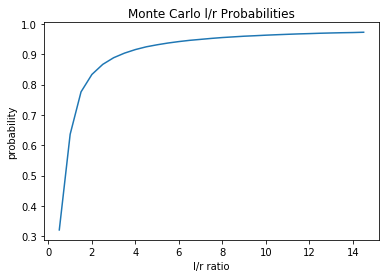

In [133]:
#Let's hold t constant to run the ratio...
lr_span = np.arange(0.5, 15, 0.5)
x_data = np.zeros(len(lr_span))
y_data = np.zeros(len(lr_span))

sim_needle = BuffonNeedle()
for i, x in enumerate(lr_span):
    x_data[i]=x
    sim_needle.l = x
    y_data[i]=sim_needle.run(100,False)
plt.plot(x_data,y_data)
plt.title("Monte Carlo l/r Probabilities")
plt.xlabel("l/r ratio")
plt.ylabel("probability")
plt.show()

### Problem 5 - Plot Analytical Probabilities as $l/t$ Changes

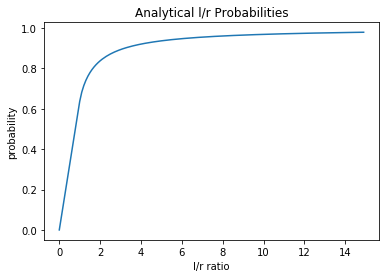

In [134]:
#Let's hold t constant to run the ratio...
lr_span = np.arange(0, 15, 0.1)
x_data = np.zeros(len(lr_span))
y_data = np.zeros(len(lr_span))

for i, x in enumerate(lr_span):
    x_data[i]=x
    y_data[i]=prob_needle(x,1)
plt.plot(x_data,y_data)
plt.title("Analytical l/r Probabilities")
plt.xlabel("l/r ratio")
plt.ylabel("probability")
plt.show()

### For Fun - Draw Buffon's Experiment (requires drawSvg library):

Board width:370 height:140
Crossings:185 Total:300
Est PI:3.24324


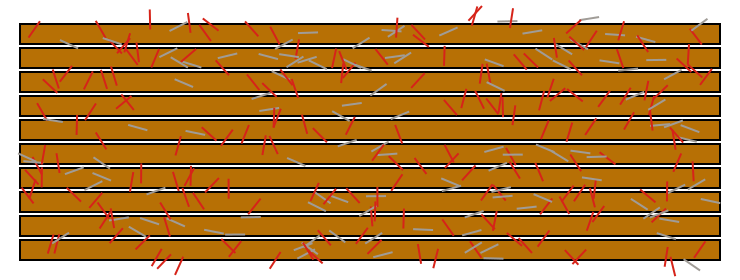

In [163]:
#Graphical simulation of needles dropped on a wooden floor
#I put together fairly quick, didn't confirm exact placement of needles on boards.

import drawSvg as draw
import random as random
DEG2RAD = np.pi/180
colors = {'wood':'#b77005','needle_miss':'#a09c97','needle_cross':'#d62319'}

#Inputs
num_planks = 10
num_needles = 300
needle_plank_ratio = 1.0
plank_width = 10
plank_length = 350
board_padding = 10
plank_padding = 2

#Calcs
board_width = plank_length + 2*board_padding
board_height = num_planks * (plank_width+plank_padding) + 2*board_padding

print("Board width:{} height:{}".format(board_width,board_height))
#Needle length as a ratio of the floor plank width
l = plank_width * needle_plank_ratio

y_padding = 2

#Was origin of center, changing it, my brain can't compute center origin stuff
#d = draw.Drawing(board_width, board_height, origin='center')
d = draw.Drawing(board_width, board_height)

#Draw the planks of the floor
#Technically, the planks are of width, plank_width+padding
for i in range(0,num_planks):
    d.append(draw.Rectangle(board_padding,board_padding+i*(plank_width+plank_padding),plank_length,plank_width, fill=colors['wood'], stroke='black'))
    #d.append(draw.Rectangle(plank_x_offset,i*(plank_width+padding),plank_length+plank_x_offset,plank_width, fill=colors['wood'], stroke='black'))

#Drop needles
crossings = 0
for j in range(0,num_needles):
    needle_x = board_padding + ((board_width-2*board_padding) * random.random())
    needle_y = board_padding + ((board_height-2*board_padding) * random.random())
    rand_theta = random.random() * 360 * DEG2RAD
    rand_x = np.cos(rand_theta) * l
    rand_y = np.sin(rand_theta) * l
    #Choose needle color based on whether it crosses the plank
    did_cross = np.abs(rand_y) > ((plank_width+plank_padding)/2)
    needle_color = colors['needle_cross'] if did_cross  else colors['needle_miss']
    if did_cross:
        crossings+=1
    p = draw.Path(stroke_width=1, stroke=needle_color,fill='black', fill_opacity=0.5)
    p.M(needle_x,needle_y)
    p.l(rand_x,rand_y)
    d.append(p)

print("Crossings:{} Total:{}".format(crossings,num_needles))
print("Est PI:{}".format(round(2*num_needles/crossings,5)))

#Render SVG
d.setPixelScale(2)  # Set number of pixels per geometry unit
d  # Display as SVG